In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_predictfrom

# Regression with ML

As final goodbye (or is it a final FU?) we will use machine learning for a regression task, trying to estimate the mice's running activity from ther phenotype data. Our target will no longer be binary (CD/HFD) or even categorical, but continuous valued.

To help you get started quickly, we have added a few lines of code to create the target vector, and deleted all running-related phenotype measurements from the input, such as night-time running activity.

In [3]:
pheno = pd.read_csv('files/phenotype_cd_hfd.csv', index_col=0)
target = pheno['24hRun_ActivityWheel_[km]']

data = pheno.dropna(axis=1).drop(columns=['strain', '24hRun_ActivityWheel_[km]','DayRun_ActivityWheel_[km]','NightRun_ActivityWheel_[km]', 'Dist_post_[m]', 'Improvement_[meters]', 'Dist_pre_[m]'])
data['diet'] = data['diet'].replace('CD', 0).replace('HFD', 1)

Initialize a regressor, for example `SVR`. You can also use `RandomForestRegressor` or `KNeighborsRegressor`, they all have the same interface, and most code you write using them is interchangeable.

In [15]:
clf = SVR()
data2 = (data - data.mean())/data.std()
clf.fit(data2, target) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Fit and predict all data. Plot the target and predicted vectors against each other using `plt.scatter`.

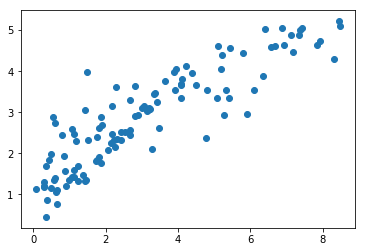

In [16]:
clf.predict(data2)

plt.scatter(x = target,y = clf.predict(data2))

Perform a cross-validated prediction. "Scoring" as such doesn't make much sense with continuous variables, so just use `cross_val_predict` and present them on a scatter plot against the target values, similar to above. Is it disappointing, satisfactory, or something in between?

Calculate the standard error as a measure of accuracy. It's a one liner: the standard deviation of difference between the predicted and the actual values.

1.9080986121618728

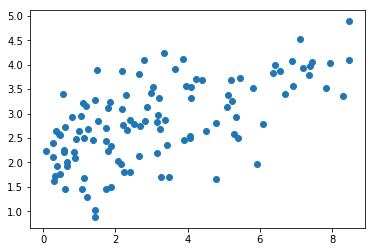

In [33]:
cv_probs = cross_val_predict(clf, data2, target, cv = KFold(3, shuffle=True))

plt.scatter(x = target,y = cv_probs)

std_error = (cv_probs - target)
np.sqrt(std_error.dot(std_error)/len(std_error))

What should we compare this performance to? A random predictor could, for example, return a random value from the available target values. Create a scatter plot of what that would be like. Hint: use `np.random.choice`, select a 100 random values twice, and plot them against each other. What is the average standard error for the random predictor?

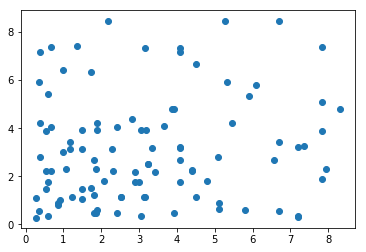

In [29]:
plt.scatter(np.random.choice(target,100), np.random.choice(target,100))

Use a `RandomForestRegressor` to do the task (use at least 100 trees though), and check the most important features. Do they make sense? Take the top 20, and evaluate models that use an increasing amount of them. Did you find a sweet spot?

In [18]:
clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(data2, target) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

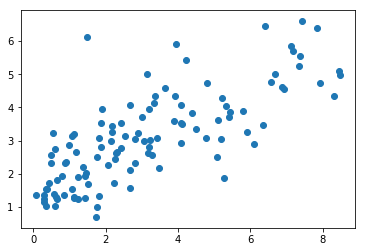

In [19]:
cv_probs_rf = cross_val_predict(clf_rf, data2, target, cv = KFold(3, shuffle=True))

plt.scatter(x = target,y = cv_probs_rf)

In [25]:
features = pd.DataFrame(clf_rf.feature_importances_, index = data.columns)

features = features.sort_values(0, ascending=False)

features

,0
BWLoss_AfterExercise_[%],0.451515
24hXYTot_TSE_[#/hr],0.063371
BodyWeight_Wk8_[g],0.056151
NightXYTot_TSE_[#/hr],0.041161
DayXYTot_TSE_[#/hr],0.039839
Gastrocnemius_[%],0.026737
BWGain_8-28Weeks_[%],0.025459
Glucose0min_OGTT_[mg/dL],0.021665
BodyWeight_postWheel_[g],0.019871
Kidney_[g],0.017281


In [28]:
features.nlargest(20, 0, keep='first')

,0
BWLoss_AfterExercise_[%],0.451515
24hXYTot_TSE_[#/hr],0.063371
BodyWeight_Wk8_[g],0.056151
NightXYTot_TSE_[#/hr],0.041161
DayXYTot_TSE_[#/hr],0.039839
Gastrocnemius_[%],0.026737
BWGain_8-28Weeks_[%],0.025459
Glucose0min_OGTT_[mg/dL],0.021665
BodyWeight_postWheel_[g],0.019871
Kidney_[g],0.017281


In [32]:
top20 = ['BWLoss_AfterExercise_[%]', '24hXYTot_TSE_[#/hr]', 'BodyWeight_Wk8_[g]', 'NightXYTot_TSE_[#/hr]', 'DayXYTot_TSE_[#/hr]', 'Gastrocnemius_[%]']
for i in range(1,20):
    cv_pred = cross_val_predict(clf_rf, data2.loc[:,top20[:i]], target, cv = KFold(3, shuffle=True))
    print(i, (cv_pred-target).std())

1 1.8424849094731017
2 1.5326583629872903
3 1.3573238824079663
4 1.4266442425371908
5 1.469885514227613
6 1.3500418331117816
7 1.4044891560714545
8 1.409085053710038
9 1.4488964082289533
10 1.3448314454143773
11 1.38722488602119
12 1.5015982725996455
13 1.4244294041532706
14 1.4441757755544
15 1.4145616841570552
16 1.4200724018234983
17 1.373666502219971
18 1.3704586864269703
19 1.4091683706634794
